# SPRINT 6.- Tasca M6 T01
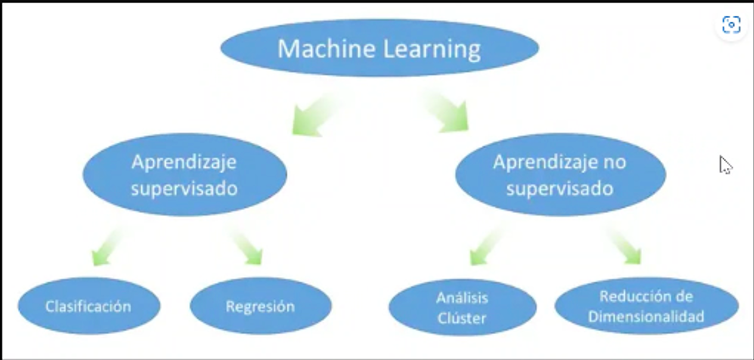

### Objectivos
- Limpieza e interpretación de los datos.
- Preprocesados.
- Creación de modelos de regresión (árboles de regresión, random monte, redes neuronales, otros modelos...).
- Utilización de las métricas para interpretar los resultados.
- Estudio y modificación de parámetros.

### Durada: 4 dies

### Descripción

Exercicis per practicar amb regressions.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# Exercici 1
Crea al menos dos modelos de regresión distintos para intentar predecir lo mejor posible el precio de las viviendas (MEDV) del archivo adjunto.


In [210]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [211]:
# GENERACIÓN DEL DATA FRAME
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.read_csv('231206 housing data.csv', names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### ANÁLISIS ESTADÍSTICO DEL CONJUNTO DE DATOS (EDA = Exploratory Data Analysis)

A continuación realizaré diferentes pruebas, aplicaré métodos y solicitaré visualizaciones con el objetivo de obtener: 
- Información sobre el tipo de datos y detección de valores nulos
- descripción estadística de las variables.
- detección de valores atípicos.
- identificación de la distribución de las variables.
- correlación de las variables entre sí.
- identificación de las variables categóricas y numéricas.

In [212]:
# INFORMACIÓN DE TIPO DE DATOS Y PRESENCIA/AUSENCIA DE VALORES NULOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [213]:
# DESCRIPCIÓN ESTADÍSTICA DE LAS VARIABLES
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


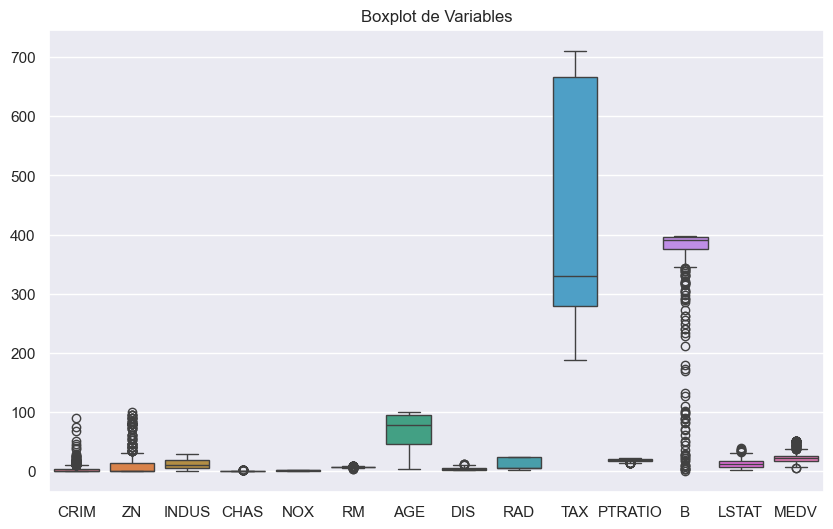

In [214]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS EN LA TABLA Y DETECCIÓN DE VARIABLES CON VALORES ATÍPICOS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
                    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]])
plt.title('Boxplot de Variables')
plt.show()

In [215]:
# ANÁLISIS DE NORMALIDAD POR VARIABLE
# Prueba de Shapiro para ver si las diferentes variables siguen una distribución gausiana:
from scipy.stats import shapiro

shapiro_results = {}

for column in df.columns:
    stat, p = shapiro(df[column])
    shapiro_results[column] = 'Gaussian' if p > 0.05 else 'Not Gaussian'

shapiro_results

{'CRIM': 'Not Gaussian',
 'ZN': 'Not Gaussian',
 'INDUS': 'Not Gaussian',
 'CHAS': 'Not Gaussian',
 'NOX': 'Not Gaussian',
 'RM': 'Not Gaussian',
 'AGE': 'Not Gaussian',
 'DIS': 'Not Gaussian',
 'RAD': 'Not Gaussian',
 'TAX': 'Not Gaussian',
 'PTRATIO': 'Not Gaussian',
 'B': 'Not Gaussian',
 'LSTAT': 'Not Gaussian',
 'MEDV': 'Not Gaussian'}

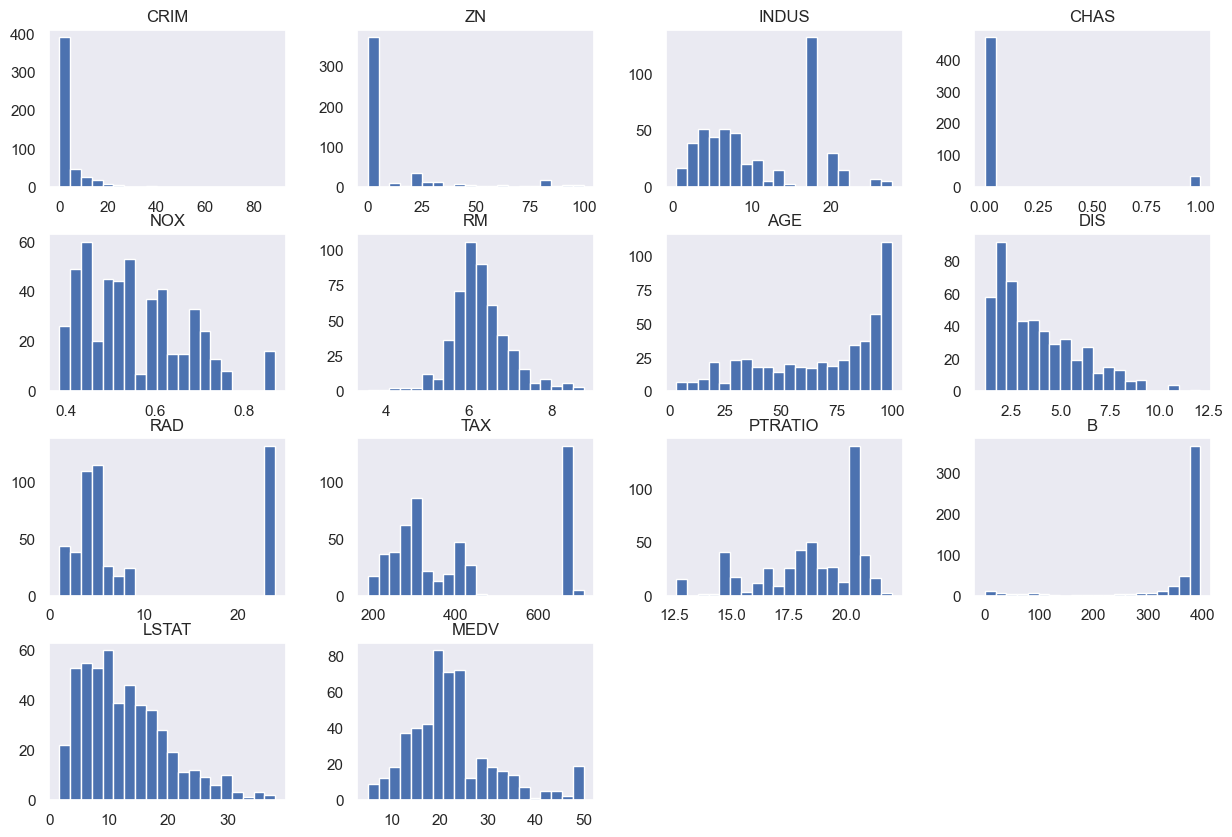

In [216]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS POR VARIABLE
df.hist(figsize=(15, 10), bins=20, grid=False) 
plt.show()

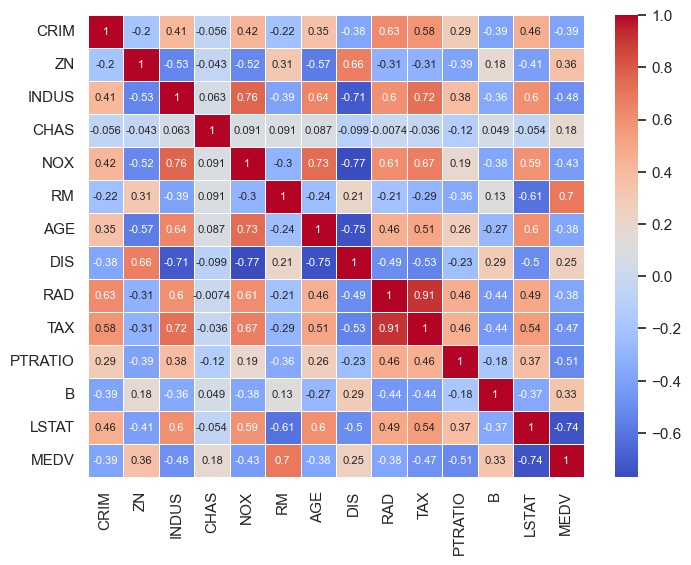

In [217]:
# ÍNDICES DE CORRELACIÓN ENTRE LAS DIFERENTES VARIABLES
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 8})
plt.show()

### ANÁLISIS DETALLADO POR VARIABLE: 

Con el objetivo de obtener:
- Identificación de valores atípicos por variable.
- Visualización de la distribución de los datos por variable
- Relación regresional de cada variable independiente con la variable dependiente MEDV


In [218]:
column = 'CRIM' # tasa de criminalidad per cápita por ciudad
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque prácticamente coinciden con el número de observaciones. 

Número de valores únicos en la variable CRIM: 504


<Figure size 800x500 with 0 Axes>

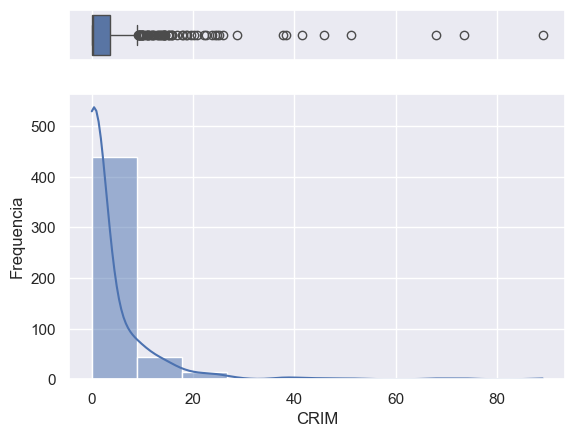

In [219]:
column = 'CRIM' # tasa de criminalidad per cápita por ciudad

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

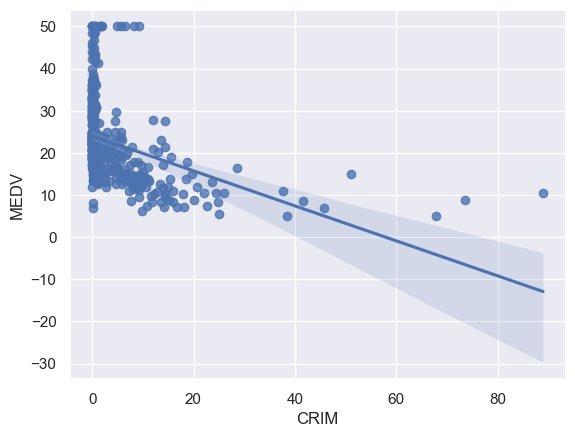

In [220]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="CRIM", y="MEDV", data=df);

In [221]:
column = 'ZN' # proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados.
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable ZN: 26


array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

<Figure size 800x500 with 0 Axes>

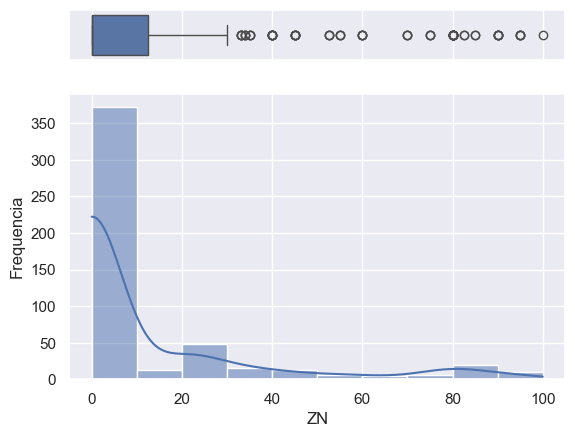

In [222]:
column = 'ZN' # proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados.

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

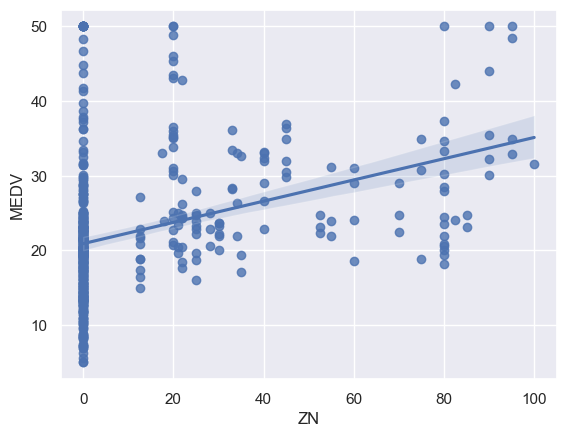

In [223]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="ZN", y="MEDV", data=df);

In [224]:
column = 'INDUS' # proporción de acres de negocios no minoristas por ciudad
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable INDUS: 76


array([ 2.31,  7.07,  2.18,  7.87,  8.14,  5.96,  2.95,  6.91,  5.64,
        4.  ,  1.22,  0.74,  1.32,  5.13,  1.38,  3.37,  6.07, 10.81,
       12.83,  4.86,  4.49,  3.41, 15.04,  2.89,  8.56, 10.01, 25.65,
       21.89, 19.58,  4.05,  2.46,  3.44,  2.93,  0.46,  1.52,  1.47,
        2.03,  2.68, 10.59, 13.89,  6.2 ,  4.93,  5.86,  3.64,  3.75,
        3.97,  6.96,  6.41,  3.33,  1.21,  2.97,  2.25,  1.76,  5.32,
        4.95, 13.92,  2.24,  6.09,  9.9 ,  7.38,  3.24,  6.06,  5.19,
        1.89,  3.78,  4.39,  4.15,  2.01,  1.25,  1.69,  2.02,  1.91,
       18.1 , 27.74,  9.69, 11.93])

<Figure size 800x500 with 0 Axes>

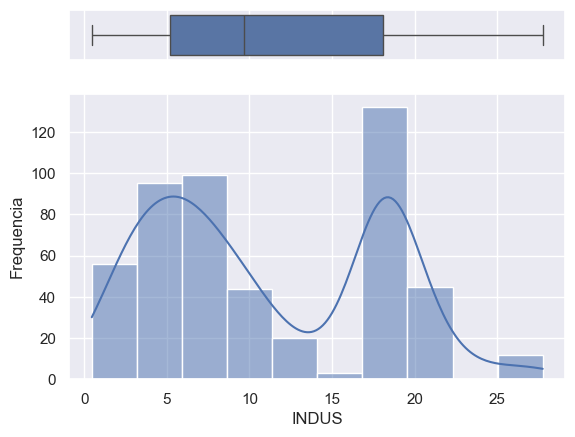

In [225]:
column = 'INDUS' # proporción de acres de negocios no minoristas por ciudad

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

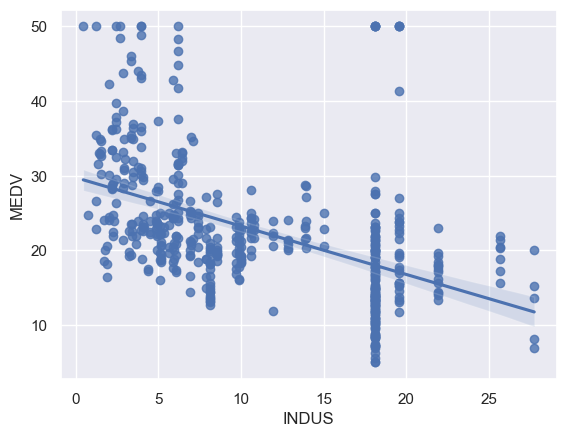

In [226]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="INDUS", y="MEDV", data=df);

In [227]:
column = 'CHAS' # variable dummie del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable CHAS: 2


array([0, 1])

<Figure size 800x500 with 0 Axes>

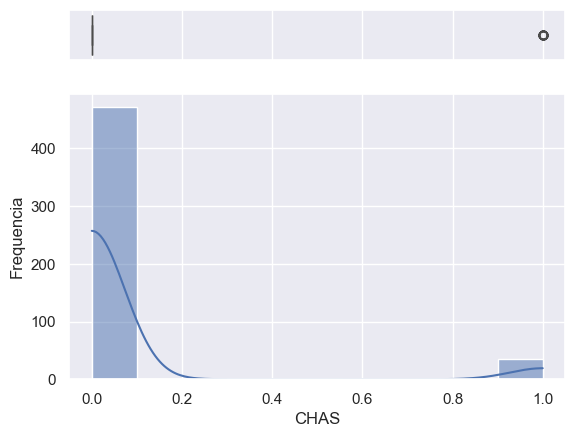

In [228]:
column = 'CHAS' # variable dummie del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

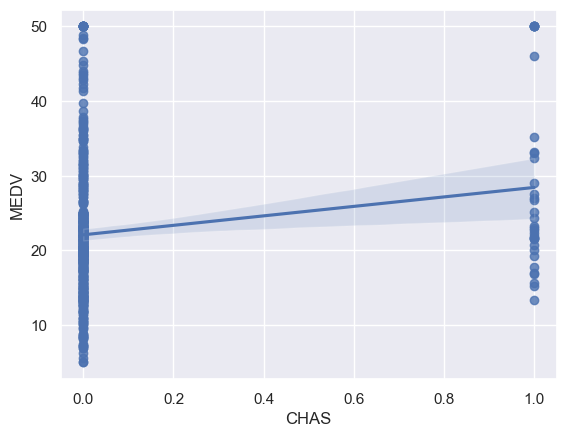

In [229]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="CHAS", y="MEDV", data=df);

In [230]:
column = 'NOX' # concentración de óxidos nítricos (partes por 10 millones)
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable NOX: 81


array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

<Figure size 800x500 with 0 Axes>

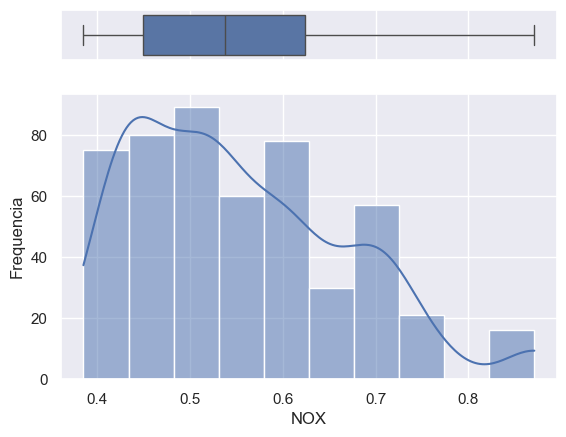

In [231]:
column = 'NOX' # concentración de óxidos nítricos (partes por 10 millones)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

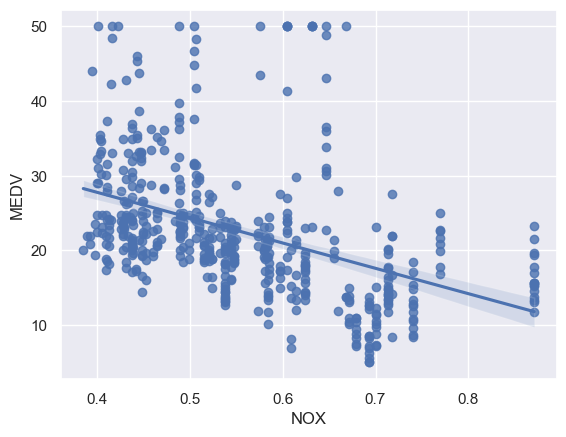

In [232]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="NOX", y="MEDV", data=df);

In [233]:
column = 'RM' # número promedio de habitaciones por vivienda 
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque son muchos, casi tantos como número de observaciones. 

Número de valores únicos en la variable RM: 446


<Figure size 800x500 with 0 Axes>

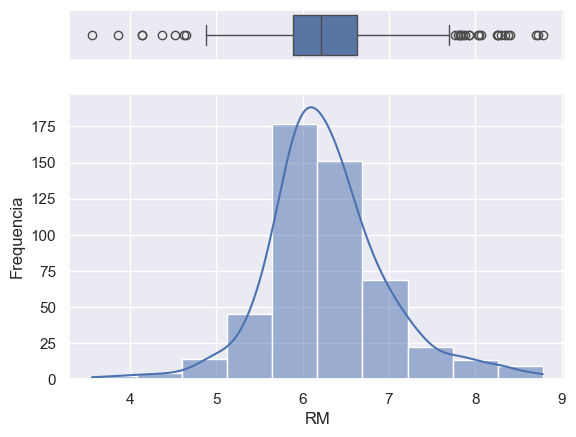

In [234]:
column = 'RM' # número promedio de habitaciones por vivienda (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

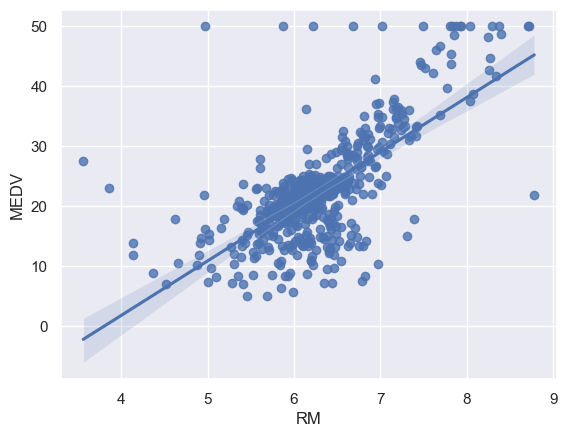

In [235]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="RM", y="MEDV", data=df);

In [236]:
column = 'AGE' # proporción de unidades ocupadas por sus propietarios construidas antes de 1940 
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque son muchos, casi tantos como número de observaciones. 

Número de valores únicos en la variable AGE: 356


<Figure size 800x500 with 0 Axes>

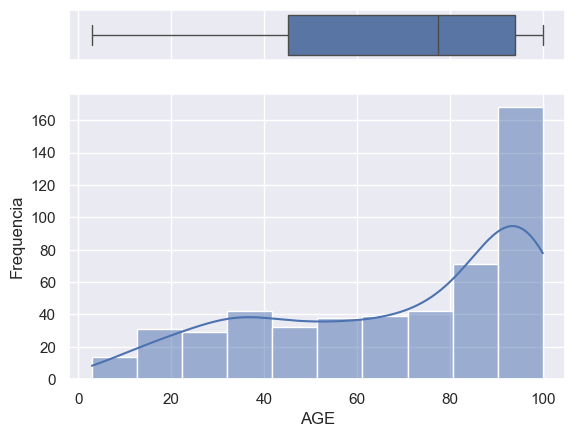

In [237]:
column = 'AGE' # proporción de unidades ocupadas por sus propietarios construidas antes de 1940 
# (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

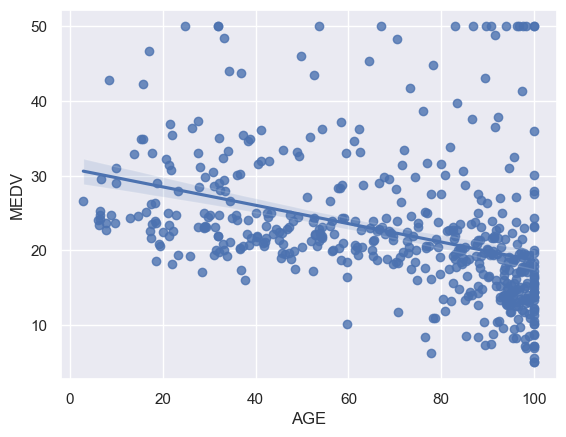

In [238]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="AGE", y="MEDV", data=df);

In [239]:
column = 'DIS' # distancias ponderadas a cinco centros de empleo de Boston
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque son muchos, casi tantos como número de observaciones. 

Número de valores únicos en la variable DIS: 412


<Figure size 800x500 with 0 Axes>

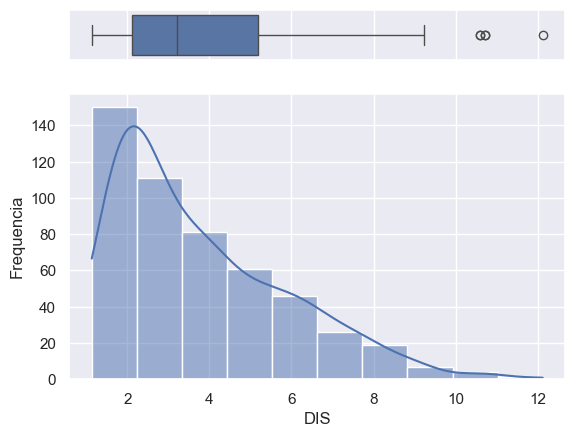

In [240]:
column = 'DIS' # distancias ponderadas a cinco centros de empleo de Boston
# (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

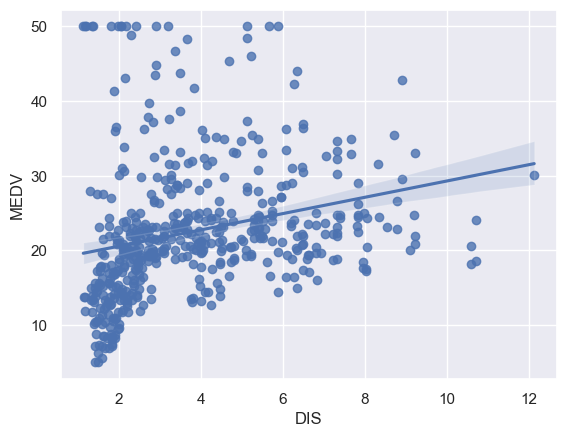

In [241]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="DIS", y="MEDV", data=df);

In [242]:
column = 'RAD' # índice de accesibilidad a carreteras radiales
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable RAD: 9


array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

<Figure size 800x500 with 0 Axes>

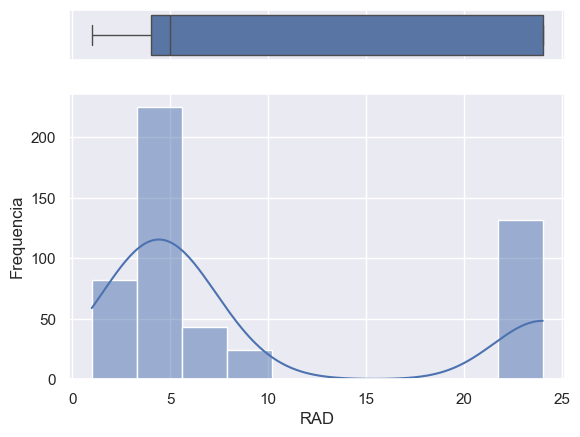

In [243]:
column = 'RAD' # índice de accesibilidad a carreteras radiales

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

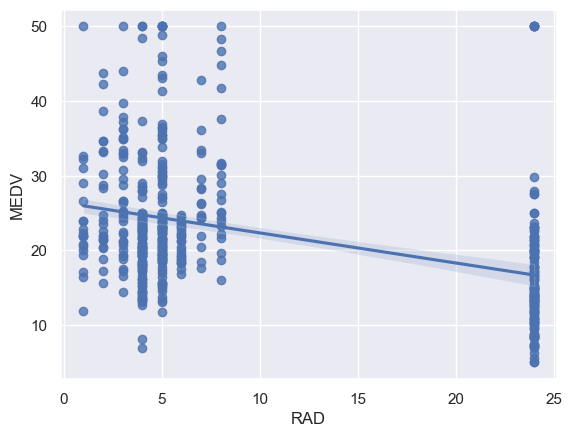

In [244]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="RAD", y="MEDV", data=df);

In [245]:
column = 'TAX' #  tasa de impuesto a la propiedad de valor total por $10
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable TAX: 66


array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

<Figure size 800x500 with 0 Axes>

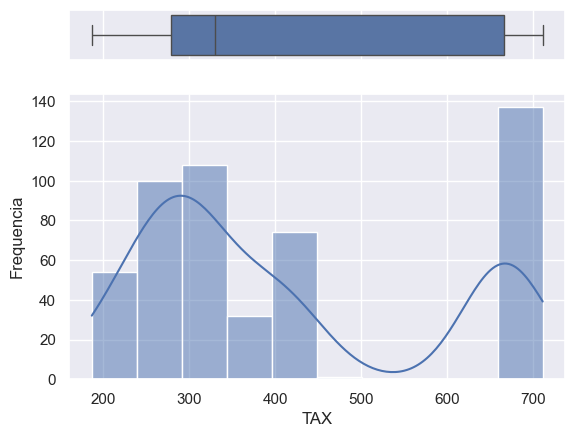

In [246]:
column = 'TAX' #  tasa de impuesto a la propiedad de valor total por $10

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

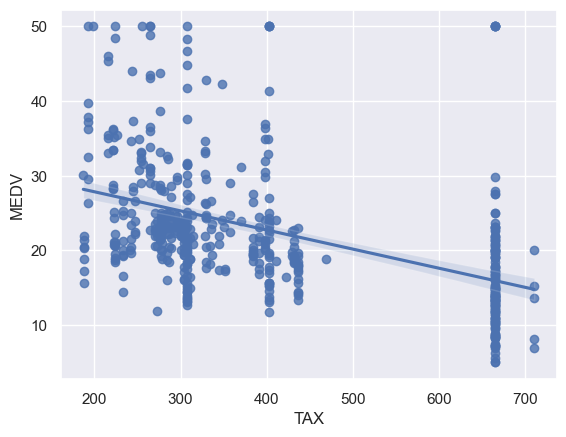

In [247]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="TAX", y="MEDV", data=df);

In [248]:
column = 'PTRATIO' # ratio alumnos-maestro por localidad
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()

Número de valores únicos en la variable PTRATIO: 46


array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

<Figure size 800x500 with 0 Axes>

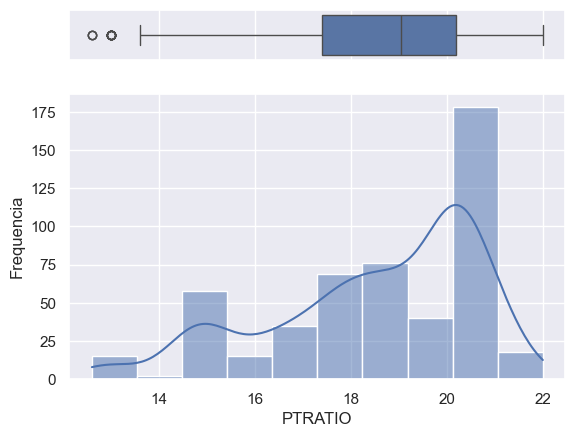

In [249]:
column = 'PTRATIO' # ratio alumnos-maestro por localidad

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

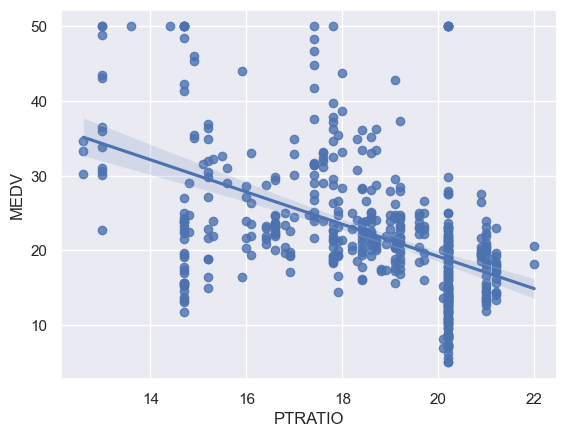

In [250]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="PTRATIO", y="MEDV", data=df);

In [251]:
column = 'B' # 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque son muchos, casi tantos como número de observaciones. 

Número de valores únicos en la variable B: 357


<Figure size 800x500 with 0 Axes>

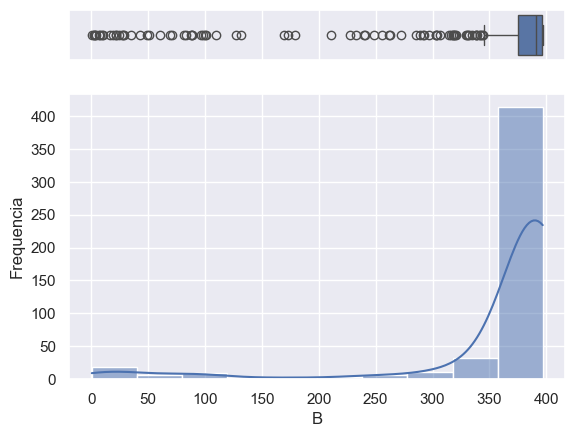

In [252]:
column = 'B' # 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
# (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

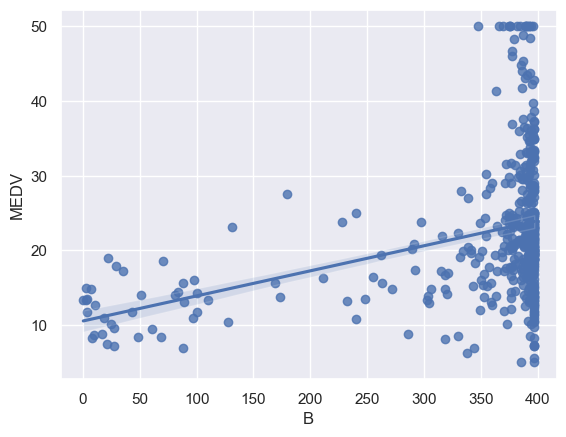

In [253]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="B", y="MEDV", data=df);

In [254]:
column = 'LSTAT' # % estatus inferior de la población
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
# No imprimo los valores porque son muchos, casi tantos como número de observaciones. 

Número de valores únicos en la variable LSTAT: 455


<Figure size 800x500 with 0 Axes>

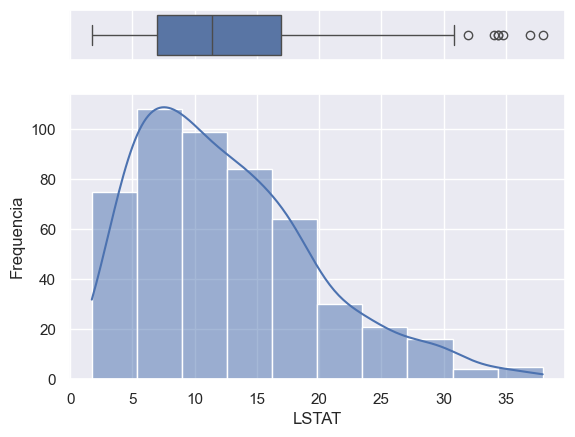

In [255]:
column = 'LSTAT' # % estatus inferior de la población
# (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

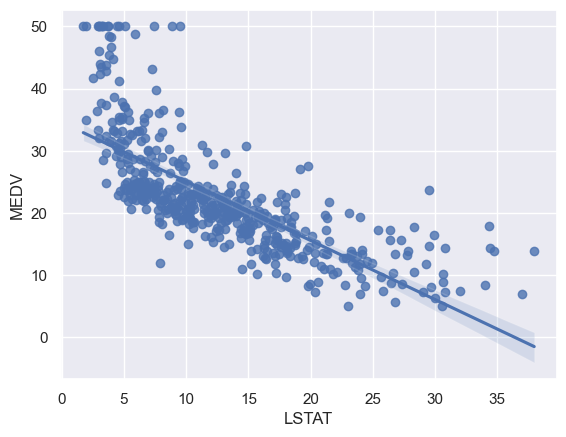

In [256]:
# Relación de esta variable con la variable MEDV (precio de la vivienda) desde el pdv de la regresión lineal
sns.regplot(x="LSTAT", y="MEDV", data=df);

In [257]:
column = 'MEDV' # Valor medio de viviendas ocupadas por sus propietarios en miles de dólares
num_uniques = df[column].nunique()
print(f"Número de valores únicos en la variable {column}:", num_uniques)
df[column].unique()
df.MEDV.unique() 

Número de valores únicos en la variable MEDV: 229


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

<Figure size 800x500 with 0 Axes>

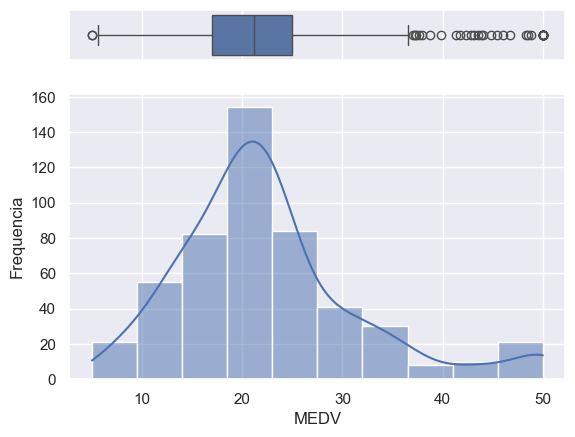

In [258]:
column = 'MEDV' # Valor medio de viviendas ocupadas por sus propietarios en miles de dólares
# (No hago el unique() porque hay muchos valores float)

plt.figure(figsize=(8, 5))# Tamaño de la figura
sns.set() # Estilos visuales predetermiandos de Seaborn

# Crear un subplot con dos áreas: boxplot ocupa 15% del espacio e histograma 85%. Comparten el eje x
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Dibujar el boxplot en la parte superior en posición horizontal
sns.boxplot(x=df[column], orient="h", ax=ax_box, linewidth=1.0)

# Dibujar el histograma en la parte inferior
sns.histplot(df[column], ax=ax_hist, bins=10, kde=True)

# Títulos de los subplots
ax_box.set(xlabel='')
ax_hist.set(xlabel=column)
plt.gca().set(xlabel=column, ylabel='Frequencia')

# Muestra la figura
plt.show()

### CONCLUSIONES DERIVADAS DEL ANÁLISIS ESTADÍSTICO: 

- __VARIABLES CATEGÓRICAS__: 

Los datos no presentan a priori ninguna variable categórica tipificada como “object”. No obstante, sí que se identifican algunas variables que, aunque numéricas, su comportamiento y distribución remite al de variables categóricas:  

>__CHAS__: es una variable binaria que con 0 y 1 nos indica si las viviendas están o no en el margen del río. Solo incluye dos valores que se corresponderían con las categorías SI / NO. 

>__RAD__: es una variable numérica discreta que recoge el índice de accesibilidad a las autopistas radiales. Como índice, registra un total de solo 9 valores, cuyos resultados numéricos podrían corresponder perfectamente con una escala de valoraciones desde “poca accesibilidad” hasta “mucha accesibilidad” con siete grados intermedios. Por lo tanto, a pesar de aparecer en la tabla como números, su comportamiento es como el de una variable categórica.  


>__TAX__: es un variable numérica continua que recoge las tasas impositivas por distrito. Si bien a primera vista parece una variable numérica continua en toda regla, la observación detallada de los datos revela que esas tasas impositivas se liquidan por tramos concretos asignados por la administración, y esos tramos son grupos estancos y sin continuidad entre ellos. En total existen 46 tramos que, en lugar de ser identificados con el valor numérico del impuesto para cada tramo, podrían perfectamente identificarse en categorías como “Tramo 1” hasta “Tramo 46”. 



- __VARIABLES CUYA CORRELACIÓN CON LA VARIABLE DEPENDIENTE ES POCO SIGNIFICATICA__: 

Según la tabla de correlación de Pearson representada mediante le mapa de calor, las variables __CHAS__ (limitar o no con el río), __DIS__ (distancias ponderadas hasta 5 centros de empleo en Boston) y __B__ (proporción de afroamericanos por distrito) mantiene una relación muy poco significativa con la variable de destino __MEDV__, por lo que se estima a priori que no van a ser relevantes para este estudio. 


- __VARIABLES QUE AFECTAN POSITIVAMENTE A LA VARIABLE DEPENDIENTE__: 

Existen dos variables cuya relación con el valor de la vivienda es claramente positiva y muy significativa:  __ZN__ (proporción de suelo residencial en el distrito) y __RM__ (numero de habitaciones por vivienda). Esta última presenta además una relación clarametne lineal con la variable dependiente. Por norma general, a mayor proporción de suelo residencial mayor precio de la vivienda. Lo mismo pasa con el número de habitaciones, cuantas más habitaciones, más cara es la vivienda.


- __VARIABLES QUE AFECTAN NEGATIVAMENTE A LA VARIABLE DEPENDIENTE__: 

Hay otras variables cuya relación con el valor de la vivienda es claramente negativa y muy significativa. Estas son: __CRIM__ (tasa de criminalidad por distrito),  __INDUST__ (proporción de suelo industrializado), __NOX__ (concentración de óxido nítrico), __AGE__ (proporción de viviendas de construcción antigua),  __RAD__ (índice de accesibilidad a autopistas radiales), __TAX__ (tasa impositiva del distrito),  __PTRATIO__ (ratios profesor/alumno por distrito) y __LSTAT__ (porcentaje de población de clase baja). Esta última es la que presente un mayor índice de correlación con la variable dependiente (-0.74), aunque la relación entre ellas es claramente no lineal. En todas estas variables, cuanto más aumentan, más se reduce el precio medio de la vivienda por distrito

- __RELACIONES COMPLEJAS ENTRE VARIABLES__: 

Tomando como referencia el índice de correlación de Pearson, se detectan tres variables que mantienen correlaciones altamente significativas con la mayoría del resto de variables. Son las variables __NOX__, __INDUX__ y __LSTAT__. Esto puede implicar que estas tres variables estén recogiendo, de alguna manera, la información de las variables con las que están relacionadas. Mantener todas las variables para el estudio puede suponer un riesgo porque podemos estar valorando varias veces una misma información y nos podría llevar a un sobreajuste de los modelos. 


- __VARIABLES QUE PRESENTAN VALORES ATÍPICOS__: 

Existen variables que presentan valores atípicos, como __CRIM/ ZN/ RN/ PTRATIO/ LSTAT/ MEDV__, que implicará tomar decisiones de preprocesado antes de proceder con la implementación de los modelos.

- __DISTRIBUCIÓN DE LAS VARIABLES__:

Según el test de Shapiro, ninguna variable presenta distribución gaussiana. Sólamente la varaible __MEDV__ se puede aproximar a la normalidad pero contiene muchos valores atípicos. Eso implicará realizar algún tipo de preprocesado en algunas de las variables con el fin de aplicar correctamente los modelos.



### ACCIONES 

Teniendo en cuenta las conclusiones expuestas en el párrafo anterior, se toman las siguientes determinaciones antes de empezar a aplicar los modelos solicitados.

- 1.- __Eliminar del análisis las variables CHAS, DIS y B__, por no ser significativas para la variable dependiente.


- 2.- __Aplicar preprocesado mediante ROBUSTSCALER__ en las variables que presentan valores atípicos: __CRIM/ ZN/ RN/ PTRATIO/ LSTAT__.


- 3.- __Aplicar preprocesado mediante STANDAR SCALER__ para las variables que no tienen valores atípicos y que no siguen una distribución normal: __INDUS/ NOX/ AGE/ RAD/ TAX__.


- 4.- En cuanto a los modelos de regresión a implementar y comparar, me decanto por estos dos: 

>__REGRESIÓN LINEAL MÚLTIPLE__: por ser más fácil de interpretar, menos propensa al sobreajuste, generaliza mejor, y tiene pocos hiperparámetros para ajustar.

>__RANDOMFOREST__:  por ser menos sensible a valores atípicos, no requiere demasiados cambios en los parámetros y es más adecuado cuando se enfrenta a distribuciones altamente no lineales con interacciones complejas entre las variables.



In [259]:
# ELIMINAR VARIABLES NO SIGNIFICATIVAS: 

df = df.drop(['CHAS', 'DIS', 'B'], axis=1)
df # Sin las columnas eliminadas

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,273.0,21.0,6.48,22.0


In [260]:
# APLICAR ROBUSTSCALER PARA VARIABLES CON VALORES ATÍPICOS Y SATANDARSCALER PARA VARIABLES NO GAUSSIANAS.
# (NOTA: A LA VARIABLE DEPENDIENTE NO SE LE SOMETE A ESTAS ESTANDARIZACIONES)
from sklearn.preprocessing import RobustScaler, StandardScaler

# Columnas para RobustScaler
columnas_atipicas = ['CRIM', 'ZN', 'RM', 'PTRATIO', 'LSTAT']

# Columnas para StandardScaler
columnas_no_gaussianas = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']

# Traer las instancias de los escaladores
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Aplicar RobustScaler a las columnas atípicas
df[columnas_atipicas] = robust_scaler.fit_transform(df[columnas_atipicas])

# Aplicar StandardScaler a las columnas no gaussianas
df[columnas_no_gaussianas] = standard_scaler.fit_transform(df[columnas_no_gaussianas])

# Visualizar el DataFrame después de la transformación
df

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.069593,1.44,-1.287909,-0.144217,0.496612,-0.120013,-0.982843,-0.666608,-1.339286,-0.637681,24.0
1,-0.063755,0.00,-0.593381,-0.740262,0.287940,0.367166,-0.867883,-0.987329,-0.446429,-0.221889,21.6
2,-0.063760,0.00,-0.593381,-0.740262,1.323171,-0.265812,-0.867883,-0.987329,-0.446429,-0.732634,34.7
3,-0.062347,0.00,-1.306878,-0.835284,1.069783,-0.809889,-0.752922,-1.106115,-0.125000,-0.841579,33.4
4,-0.052144,0.00,-1.306878,-0.835284,1.271680,-0.511180,-0.752922,-1.106115,-0.125000,-0.602699,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.115738,0.158124,0.521003,0.018673,-0.982843,-0.803212,0.696429,-0.168916,22.4
502,-0.058759,0.00,0.115738,0.158124,-0.119919,0.288933,-0.982843,-0.803212,0.696429,-0.227886,20.6
503,-0.054450,0.00,0.115738,0.158124,1.039973,0.797449,-0.982843,-0.803212,0.696429,-0.571714,23.9
504,-0.040867,0.00,0.115738,0.158124,0.793360,0.736996,-0.982843,-0.803212,0.696429,-0.487756,22.0


In [262]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS TRAS EL PREPROCESADO
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
count,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,506.000000
mean,9.337910e-01,0.909091,2.106352e-16,-1.965929e-16,0.103163,-1.474446e-16,-1.123388e-16,0.000000,-0.212309,1.292417e-01,22.532806
std,2.392616e+00,1.865796,1.000990e+00,1.000990e+00,0.952056,1.000990e+00,1.000990e+00,1.000990,0.773195,7.137493e-01,9.197104
min,-6.959315e-02,0.000000,-1.557842e+00,-1.465882e+00,-3.587398,-2.335437e+00,-9.828429e-01,-1.313990,-2.303571,-9.625187e-01,5.000000
25%,-4.852940e-02,0.000000,-8.676906e-01,-9.130288e-01,-0.437669,-8.374480e-01,-6.379618e-01,-0.767576,-0.589286,-4.407796e-01,17.025000
50%,-7.697835e-18,0.000000,-2.110985e-01,-1.442174e-01,0.000000,3.173816e-01,-5.230014e-01,-0.464673,0.000000,8.847090e-17,21.200000
75%,9.514706e-01,1.000000,1.015999e+00,5.986790e-01,0.562331,9.067981e-01,1.661245e+00,1.530926,0.410714,5.592204e-01,25.000000
max,2.467838e+01,8.000000,2.422565e+00,2.732346e+00,3.484417,1.117494e+00,1.661245e+00,1.798194,1.053571,2.659670e+00,50.000000


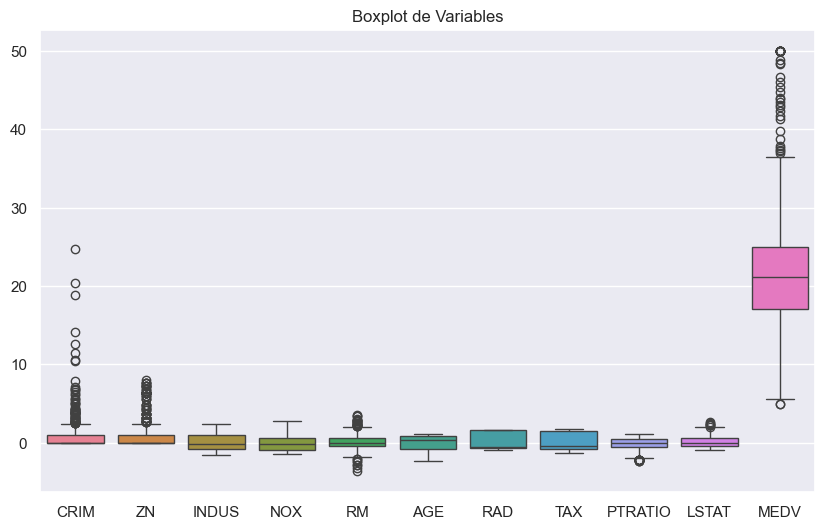

In [263]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS EN LA TABLA Y DETECCIÓN DE VARIABLES CON VALORES ATÍPICOS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "RAD",
                    "TAX", "PTRATIO", "LSTAT", "MEDV"]])
plt.title('Boxplot de Variables')
plt.show()

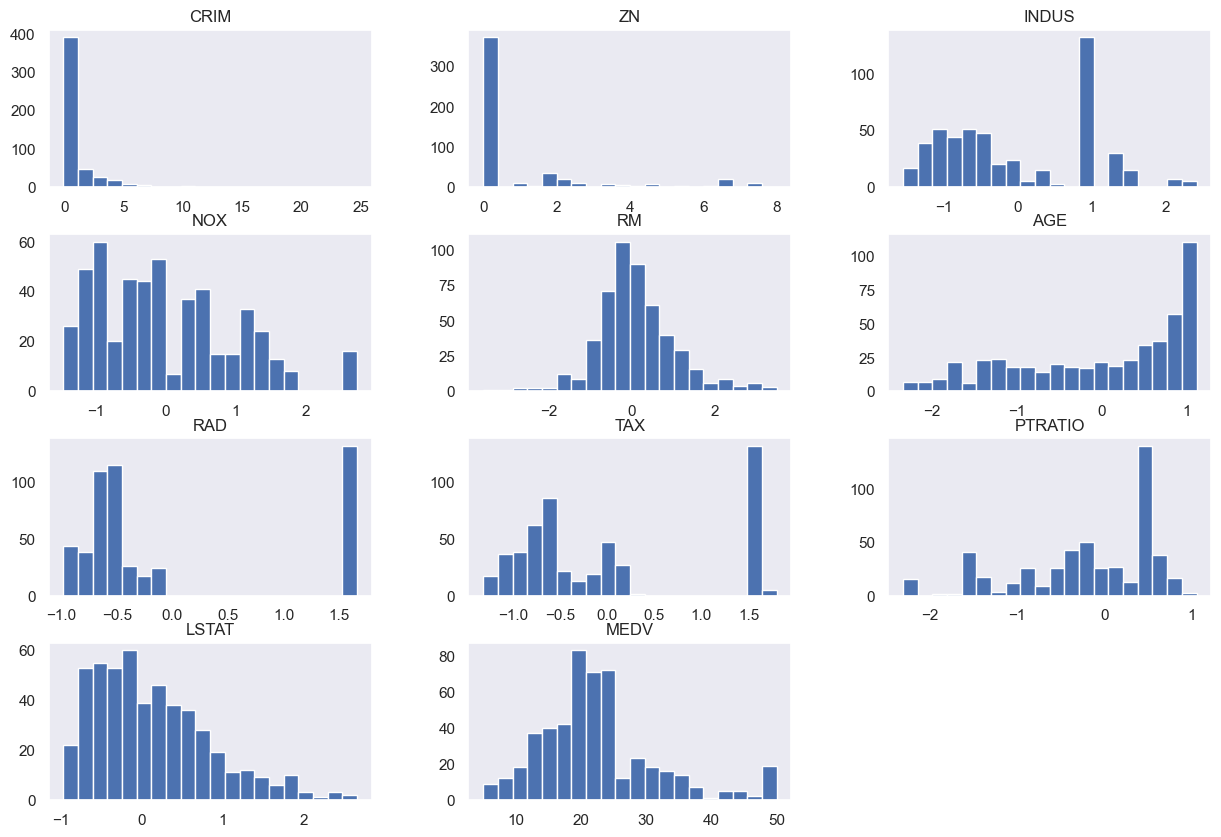

In [264]:
# VISUALIZACIÓN DE LA DISTRIBUCIÓN DE DATOS POR VARIABLE
df.hist(figsize=(15, 10), bins=20, grid=False) 
plt.show()

### MODELO DE REGRESIÓN LINEAL MÚLTIPLE

In [265]:
# Importación de librerías: 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Traer el modelo de regresión lineal múltiple
model = LinearRegression()

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred = model.predict(X)

# Imprimir las pendientes y la intercepción del modelo
print('Variables : [/CRIM/   /ZN/  /INDUS/ /NOX/   /RM/  /AGE / /RAD/  /TAX/ PTRATIO LSTAT]')
print("Pendientes:", [round(coef, 3) for coef in model.coef_])
print("\nIntercepción:", round(model.intercept_,3))

# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir los estadistícos: MSE y R2
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): {round(mse,3)}")
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_R2 Score: {round(r2,3)}")

Variables : [/CRIM/   /ZN/  /INDUS/ /NOX/   /RM/  /AGE / /RAD/  /TAX/ PTRATIO LSTAT]
Pendientes: [-0.357, 0.076, 0.907, -1.192, 3.032, 0.99, 2.785, -2.497, -2.997, -5.8]

Intercepción: 22.598

REGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): 25.44

REGRESIÓN LINEAL MÚLTIPLE_R2 Score: 0.699


### MODELO DE REGRESIÓN RANDOM FOREST

In [266]:
# Importar libreria
from sklearn.ensemble import RandomForestRegressor

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Traer el modelo Random Forest
model = RandomForestRegressor(random_state=1)

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred = model.predict(X)

# El modelo Random Forest no ofrece coeficientes ni interceptos, sino la importancia de cada Variable: 

importancia_variable = model.feature_importances_

# Asociar importancia con nombres de las variables
importancia_variable_dict = dict(zip(X.columns, importancia_variable))

# Imprimir la importancia de cada variable
print('La importancia de cada variable:\n')
for variable, importancia in importancia_variable_dict.items():
    print(f"{variable}: {importancia:.4f}")
    
# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir los estadistícos: MSE y R2
print(f"\nREGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): {round(mse,3)}")
print(f"\nREGRESIÓN RANDOM FOREST_R2 Score: {round(r2,3)}")

La importancia de cada variable:

CRIM: 0.0697
ZN: 0.0015
INDUS: 0.0090
NOX: 0.0343
RM: 0.4236
AGE: 0.0226
RAD: 0.0050
TAX: 0.0165
PTRATIO: 0.0198
LSTAT: 0.3981

REGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): 1.654

REGRESIÓN RANDOM FOREST_R2 Score: 0.98


<font color='blue'>__.........................................................................................................................................................................................................................................................................__

## Exercici 2
Compáralos los dos modelos de regresión en base al MSE y al R2.

El __ERROR CUADRÁTICO MEDIO (MSE)__ es la media de las diferencias al cuadrado entre las predicciones y los valores reales. Un valor bajo de MSE (o de SSE, que sería la suma de errores al cuadrado sin calcularle la media) indica un buen ajuste del modelo a los datos, mientras que valores altos indican que el modelo no se ajusta bien a los datos observados.

                                                 SUMA DE ERRORES AL CUADRADO: 
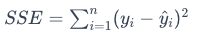
                                                    
                                                 ERROR CUADRÁTICO MEDIO: 
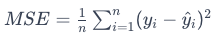

Al aplicar los dos modelos hemos obtenido los siguientes resultados: 
- REGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): 25.44
- REGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): 1.654

El valor más bajo obtenido en el modelo de Random Forest indica que este modelo tiende a cometer menos errores en el momento de realizar predicciones. De hecho, el valor tan alto obtenido en la resgresión lineal, del orden de 15 veces mayor, ya nos indica que la regresión lineal no se va a comportar bien al predecir los precios de la vivienda con las variables que hemos considerado para el estudio.

El __R2_score__ mide la correlación entre las variables independientes con la dependiente, en base a la varianza de las respuestas. Compara la varianza explicada por el modelo con la varianza total de los datos. Lo que nos proporciona es una medida de lo bien o mal que predice el modelo. Sus valores varían entre 0 y 1. Un valor de 0 indica la falta de relación entre las variables, por lo tanto la ineficacia del modelo en el momento de realizar predicciones. Cuanto más cerca de 1 está el valor R2, mejor predice el modelo. 

En nuestro caso hemos obtenido: 
- REGRESIÓN LINEAL MÚLTIPLE_R2 Score: 0.699
- REGRESIÓN RANDOM FOREST_R2 Score: 0.98

Lo que nos indica que el modelo Random Forest explica mejor la variabilidad en las respuestas, por lo tanto va a acertar más en el momento de hacer predicciones.

Como __CONCLUSIÓN__, la comparación de los dos estadísticos MSE y R2 nos indican que, partiendo de las variables que se han cosiderado en el estudio, el modelo Random Forest va a predecir mejor los precios de la vivienda.   

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

## Exercici 3
Entrénalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

In [267]:
# ENTRENO DEL MODELO DE REGRESIÓN LINEAL MULTIPLE CON EL HIPERPARÁMETRO fit_intercept=False (QUE NO CALCULE EL INTERCEPTO)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Traer el modelo de regresión lineal múltiple
model = LinearRegression(fit_intercept=False)

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred = model.predict(X)

# Imprimir las pendientes y la intercepción del modelo
print('Variables : [/CRIM/   /ZN/  /INDUS/ /NOX/   /RM/  /AGE / /RAD/  /TAX/ PTRATIO LSTAT]')
print("Pendientes:", [round(coef, 3) for coef in model.coef_])
print("\nIntercepción:", round(model.intercept_,3))

# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir los estadistícos: MSE y R2
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): {round(mse,3)}")
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_R2 Score: {round(r2,3)}")

Variables : [/CRIM/   /ZN/  /INDUS/ /NOX/   /RM/  /AGE / /RAD/  /TAX/ PTRATIO LSTAT]
Pendientes: [2.704, 5.027, 5.485, -1.897, 6.298, 2.04, 1.604, -7.367, -6.022, 2.466]

Intercepción: 0.0

REGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): 323.536

REGRESIÓN LINEAL MÚLTIPLE_R2 Score: -2.832


In [268]:
# ENTRENO DEL MODELO RANDOM FOREST CON LOS HIPERPARÁMETROS n_estimators=100 / max_depth=10/ random_state=42
# Importar libreria
from sklearn.ensemble import RandomForestRegressor

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Traer el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=1)

# Ajustar el modelo con todos los datos
model.fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred = model.predict(X)


# El modelo Random Forest no ofrece coeficientes ni interceptos, sino la importancia de cada Variable: 

importancia_variable = model.feature_importances_

# Asociar importancia con nombres de las variables
importancia_variable_dict = dict(zip(X.columns, importancia_variable))

# Imprimir la importancia de cada variable
print('La importancia de cada variable:\n')
for variable, importancia in importancia_variable_dict.items():
    print(f"{variable}: {importancia:.4f}")
    
# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Imprimir los estadistícos: MSE y R2
print(f"\nREGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): {round(mse,3)}")
print(f"\nREGRESIÓN RANDOM FOREST_R2 Score: {round(r2,3)}")

La importancia de cada variable:

CRIM: 0.0690
ZN: 0.0013
INDUS: 0.0081
NOX: 0.0344
RM: 0.4254
AGE: 0.0221
RAD: 0.0050
TAX: 0.0162
PTRATIO: 0.0204
LSTAT: 0.3983

REGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): 1.921

REGRESIÓN RANDOM FOREST_R2 Score: 0.977


__CONCLUSIÓN AL USO DE HIPERPARÁMETROS__
- En la __Regresión Lineal Múltiple__ la consideración de hipeparámetros no mejora en absoluto la predicción, El Error cuadrático medio es muy superior e incluso en el R2 ofrece un valor negativo, que no tiene sentido.

- En el __Ramdom Forest__ no hay tanta difernecia cuando se incluyen hiperperámetros en el modelo, pero de forma general no se puede decir que lo mejore. En la importancia de las variables y en el R2 la diferencia no es apenas significativo. Solo en el Error Cuadrático Medio (MES) podemos decir que la inclusión de hiperparámetros ofrece un valor significativamente mayor. Dado que solo mejora el MES pero no el R2 ni la importancia de las variables, concluyo que la inclusión de hiperparámetros no mejora el modelo Ramdom Forest para este caso de estudio con las variables seleccionadas.


<font color='red'>__NOTA A LA PROFESORA LUCIA__: Me dijiste que en este ejercicio podría o debería aplicar __GridSearch__ y __GridSearchCV__, pero son conceptos que no sé que son y no los he encontrado en ninguno de los apartados de la literatura recomendada en sprint. ¿Quizás sean conceptos que me aparecerán en sprint superiores? No lo sé, lo investigaré.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

## Exercici 4
Compara su rendimiento utilizando la aproximación Train/Test o utilizando todos los datos (validación interna).

In [269]:
# EJECUCIÓN DEL CONJUNTO TRAIN/TEST

# Identificar los elementos de entrada (X) y salida (y), ytransformarlos en objetos numpy con la instrucción .values
X = df.iloc[:, :-1].values
y = df['MEDV'].values

# ImportAR train_test_split y dividir en grupos Train/test al 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Comprobar la forma de ambas divisiones: 
print('\nLa forma para ambas divisones es:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# APROXIMACIÓN CON REGRESIÓN LINEAL MÚLTIPLE
from sklearn.linear_model import LinearRegression

# Entrenar y ajustar el modelo de Regresión Lineal Múltiple: 
model_rlm = LinearRegression()
model_rlm.fit(X_train, y_train)

# Obtener predicciones con el modelo de Regresión Lineal Múltiple: 
y_train_rlm_predict = model_rlm.predict(X_train)
y_test_rlm_predict = model_rlm.predict(X_test)

# Evaluación del desempeño del algoritmo de Regresión Lineal Múltiple mediante el MSE y el R2 en ambos grupos

# Grupo de entreno
mse_rlm_train = mean_squared_error(y_train, y_train_rlm_predict)
r2_rlm_train = r2_score(y_train, y_train_rlm_predict)
 
# Imprimir los estadistícos MSE y R2 para ambos grupos
print(f"\n\nREGRESIÓN LINEAL MÚLTIPLE_GRUPO DE ENTRENO_Error cuadrático medio (MSE): {round(mse_rlm_train,3)}")
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_GRUPO DE ENTRENO_R2 Score: {round(r2_rlm_train,3)}")

# Grupo de prueba
mse_rlm_test = mean_squared_error(y_test, y_test_rlm_predict)
r2_rlm_test = r2_score(y_test, y_test_rlm_predict)
 
# Imprimir los estadistícos MSE y R2 para ambos grupos
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_GRUPO DE PRUEBA_Error cuadrático medio (MSE): {round(mse_rlm_test,3)}")
print(f"\nREGRESIÓN LINEAL MÚLTIPLE_GRUPO DE PRUEBA_R2 Score: {round(r2_rlm_test,3)}")

# APROXIMACIÓN CON REGRESIÓN RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Entrenar y ajustar el modelo de Regresión Lineal Múltiple: 
model_rf = RandomForestRegressor(random_state=1)
model_rf.fit(X_train, y_train)

# Obtener predicciones con el modelo de Regresión Lineal Múltiple: 
y_train_rf_predict = model_rf.predict(X_train)
y_test_rf_predict = model_rf.predict(X_test)

# Evaluación del desempeño del algoritmo de Regresión Lineal Múltiple mediante el MSE y el R2 en ambos grupos

# Grupo de entreno
mse_rf_train = mean_squared_error(y_train, y_train_rf_predict)
r2_rf_train = r2_score(y_train, y_train_rf_predict)
 
# Imprimir los estadistícos MSE y R2 para ambos grupos
print(f"\n\nREGRESIÓN RANDOM FOREST_GRUPO DE ENTRENO_Error cuadrático medio (MSE): {round(mse_rf_train,3)}")
print(f"\nREGRESIÓN RANDOM FOREST_GRUPO DE ENTRENO_R2 Score: {round(r2_rf_train,3)}")

# Grupo de prueba
mse_rf_test = mean_squared_error(y_test, y_test_rf_predict)
r2_rf_test = r2_score(y_test, y_test_rf_predict)
 
# Imprimir los estadistícos MSE y R2 para ambos grupos
print(f"\nREGRESIÓN RANDOM FOREST_GRUPO DE PRUEBA_Error cuadrático medio (MSE): {round(mse_rf_test,3)}")
print(f"\nREGRESIÓN RANDOM FOREST_GRUPO DE PRUEBA_R2 Score: {round(r2_rf_test,3)}")


La forma para ambas divisones es: (339, 10) (167, 10) (339,) (167,)


REGRESIÓN LINEAL MÚLTIPLE_GRUPO DE ENTRENO_Error cuadrático medio (MSE): 26.336

REGRESIÓN LINEAL MÚLTIPLE_GRUPO DE ENTRENO_R2 Score: 0.681

REGRESIÓN LINEAL MÚLTIPLE_GRUPO DE PRUEBA_Error cuadrático medio (MSE): 24.439

REGRESIÓN LINEAL MÚLTIPLE_GRUPO DE PRUEBA_R2 Score: 0.722


REGRESIÓN RANDOM FOREST_GRUPO DE ENTRENO_Error cuadrático medio (MSE): 1.939

REGRESIÓN RANDOM FOREST_GRUPO DE ENTRENO_R2 Score: 0.976

REGRESIÓN RANDOM FOREST_GRUPO DE PRUEBA_Error cuadrático medio (MSE): 10.131

REGRESIÓN RANDOM FOREST_GRUPO DE PRUEBA_R2 Score: 0.885


__CONCLUSIONES A LA COMPARACIÓN DE LOS RENDIMIENTOS DE LOS MODELOS DE REGRESIÓN LINEAR MÚLTIPLE Y RANDOM FOREST MEDIANTE LA APROXIMACIÓN TRAIN/TEST vs VALIDACIÓN INTERNA (considerando todos los datos)__.

Los datos de MSE y R2 otenidos en el Ejercicio 1 por validación interna para los dos modelos de regresión fueron (nota: considero los resultados obtenidos en los modelos sin hiperparametros, puesto que he comprobado que la inclusión de hiperparámetros no mejoraba los resultados): 

- REGRESIÓN LINEAL MÚLTIPLE_Error cuadrático medio (MSE): 25.44

- REGRESIÓN LINEAL MÚLTIPLE_R2 Score: 0.699

- REGRESIÓN RANDOM FOREST_Error cuadrático medio (MSE): 2.157

- REGRESIÓN RANDOM FOREST_R2 Score: 0.974


Visualizando estas métricas que obtuve en el Ejercico uno junto con las que acabo de obtener en este Ejercicio 4 en una tabla resumen, obtenemos: 

In [270]:
Resultados = {
    'Modelo': ['Regresión Lineal Múltiple', 'Regresión Lineal Múltiple', 'Regresión Lineal Múltiple',
               'Regresión Random Forest', 'Regresión Random Forest', 'Regresión Random Forest',],
    'Conjunto': ['Validación Interna', 'Grupo de Entrenamiento', 'Grupo de Prueba'] * 2,
    'MSE': [25.44, 29.259, 32.214, 2.157, 2.639, 16.474],
    'R2': [0.699, 0.645, 0.634, 0.974, 0.968, 0.813]
}

Resumen = pd.DataFrame(Resultados)
Resumen

,Modelo,Conjunto,MSE,R2
0,Regresión Lineal Múltiple,Validación Interna,25.440,0.699
1,Regresión Lineal Múltiple,Grupo de Entrenamiento,29.259,0.645
2,Regresión Lineal Múltiple,Grupo de Prueba,32.214,0.634
3,Regresión Random Forest,Validación Interna,2.157,0.974
4,Regresión Random Forest,Grupo de Entrenamiento,2.639,0.968
5,Regresión Random Forest,Grupo de Prueba,16.474,0.813


A la vista de estos resultados se pueden sacar las siguientes __CONCLUSIONES__: 

- __El Modelo de regresión Random Forest presenta resultados mucho mejores que el de Regresión Lineal Múltiple__ en lo que se refiere a los evaluadores MSE y R2 tanto para la validación interna como para la aproximación en grupos de entrenamiento y prueba.


- En la __comparación de los evaluadores MSE y R2 entre la validación interna y la aproximación en grupos de entrenamiento y prueba, no se detectan deferencias significativas en ninguno de los dos modelos de regresión__. Es más, la valoración interna en ambos grupos, ofrece unos resultados de R2 superiores, lo que indica que puede haber indicios de sobreajuste.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

## Exercici 5
No utilices la variable del número de habitaciones (RM) a la hora de realizar predicciones.

In [271]:
# VER LA TABLA DE PARTIDA
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.069593,1.44,-1.287909,-0.144217,0.496612,-0.120013,-0.982843,-0.666608,-1.339286,-0.637681,24.0
1,-0.063755,0.00,-0.593381,-0.740262,0.287940,0.367166,-0.867883,-0.987329,-0.446429,-0.221889,21.6
2,-0.063760,0.00,-0.593381,-0.740262,1.323171,-0.265812,-0.867883,-0.987329,-0.446429,-0.732634,34.7
3,-0.062347,0.00,-1.306878,-0.835284,1.069783,-0.809889,-0.752922,-1.106115,-0.125000,-0.841579,33.4
4,-0.052144,0.00,-1.306878,-0.835284,1.271680,-0.511180,-0.752922,-1.106115,-0.125000,-0.602699,36.2


In [272]:
# ELIMINAR LA VARIABLES RM: 

dfnew = df.drop(['RM'], axis=1)
dfnew.head() # Sin la columna RM

,CRIM,ZN,INDUS,NOX,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.069593,1.44,-1.287909,-0.144217,-0.120013,-0.982843,-0.666608,-1.339286,-0.637681,24.0
1,-0.063755,0.00,-0.593381,-0.740262,0.367166,-0.867883,-0.987329,-0.446429,-0.221889,21.6
2,-0.063760,0.00,-0.593381,-0.740262,-0.265812,-0.867883,-0.987329,-0.446429,-0.732634,34.7
3,-0.062347,0.00,-1.306878,-0.835284,-0.809889,-0.752922,-1.106115,-0.125000,-0.841579,33.4
4,-0.052144,0.00,-1.306878,-0.835284,-0.511180,-0.752922,-1.106115,-0.125000,-0.602699,36.2


In [273]:
# APLICAR LOS DOS MODELOS DE REGRESIÓN SOBRE LA TOTALIDIDAD DE DATOS SIN LA VARIABLE RM

X = dfnew.drop('MEDV', axis=1)
y = dfnew['MEDV']

# Entreno y ajuste del modelo de regresión lineal múltiple
sinRM_todos_rlm = LinearRegression().fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred_sinRM_todos_rlm = sinRM_todos_rlm.predict(X)

# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse_sinRM_todos_rlm = mean_squared_error(y, y_pred_sinRM_todos_rlm)
r2_sinRM_todos_rlm = r2_score(y, y_pred_sinRM_todos_rlm)

# Imprimir los estadistícos: MSE y R2
print(f"\nDATOS SIN RM/ TODOS /RLM /MSE: {round(mse_sinRM_todos_rlm,3)}")
print(f"\nDATOS SIN RM/ TODOS /RLM /R2: {round(r2_sinRM_todos_rlm,3)}")



# Entreno y ajuste del modelo de regresión Random Forest
sinRM_todos_rf = RandomForestRegressor(random_state=1).fit(X, y)

# Realizar predicciones en todos los datos del dataframe
y_pred_sinRM_todos_rf = sinRM_todos_rf.predict(X)

# Evaluación del desempeño del algoritmo mediante el MSE y el R2
mse_sinRM_todos_rf = mean_squared_error(y, y_pred_sinRM_todos_rf)
r2_sinRM_todos_rf = r2_score(y, y_pred_sinRM_todos_rf)

# Imprimir los estadistícos: MSE y R2
print(f"\nDATOS SIN RM/ TODOS /RF /MSE: {round(mse_sinRM_todos_rf,3)}")
print(f"\nDATOS SIN RM/ TODOS /RF /R2: {round(r2_sinRM_todos_rf,3)}")



DATOS SIN RM/ TODOS /RLM /MSE: 29.869

DATOS SIN RM/ TODOS /RLM /R2: 0.646

DATOS SIN RM/ TODOS /RF /MSE: 2.157

DATOS SIN RM/ TODOS /RF /R2: 0.974


In [275]:
# APLICAR LOS DOS MODELOS DE REGRESIÓN SOBRE EL CONJUNTO TRAIN/TEST SIN LA VARIABLE RM

# Identificar los elementos de entrada (X) y salida (y), ytransformarlos en objetos numpy con la instrucción .values
X = dfnew.iloc[:, :-1].values
y = dfnew['MEDV'].values

# ImportAR train_test_split y dividir en grupos Train/test al 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


# APROXIMACIÓN CON REGRESIÓN LINEAL MÚLTIPLE
from sklearn.linear_model import LinearRegression

# Entrenar y ajustar el modelo de Regresión Lineal Múltiple en el grupo de entreno: 
sinRM_train_rlm = LinearRegression().fit(X_train, y_train)

# Obtener predicciones con el modelo de Regresión Lineal Múltiple: 
y_train_sinRM_rlm_predict = sinRM_train_rlm.predict(X_train)
y_test_sinRM_rlm_predict = sinRM_train_rlm.predict(X_test)

# Evaluación del desempeño del algoritmo de Regresión Lineal Múltiple mediante el MSE y el R2 en ambos grupos

# Grupo de entreno
mse_sinRM_rlm_train = mean_squared_error(y_train, y_train_sinRM_rlm_predict)
r2_sinRM_rlm_train = r2_score(y_train, y_train_sinRM_rlm_predict)
 
# Imprimir los estadistícos MSE y R2 en rupo de entreno
print(f"\n\nDATOS SIN RM/ GRUPO PRUEBA/ RLM / MSE: {round(mse_sinRM_rlm_train,3)}")
print(f"\nDATOS SIN RM/ GRUPO PRUEBA/ RLM / R2: {round(r2_sinRM_rlm_train,3)}")

# Grupo de prueba
mse_sinRM_rlm_test = mean_squared_error(y_test, y_test_sinRM_rlm_predict)
r2_sinRM_rlm_test = r2_score(y_test, y_test_sinRM_rlm_predict)
 
# Imprimir los estadistícos MSE y R2 en grupo de prueba
print(f"\nDATOS SIN RM/ GRUPO TEST/ RLM / MSE: {round(mse_sinRM_rlm_test,3)}")
print(f"\nDATOS SIN RM/ GRUPO TEST/ RLM / R2: {round(r2_sinRM_rlm_test,3)}")


# APROXIMACIÓN CON REGRESIÓN RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Entrenar y ajustar el modelo de Random Forest
sinRM_train_rf = RandomForestRegressor(random_state=1).fit(X_train, y_train)

# Obtener predicciones con el modelo Random Forest: 
y_train_sinRM_rf_predict = sinRM_train_rf.predict(X_train)
y_test_sinRM_rf_predict = sinRM_train_rf.predict(X_test)

# Evaluación del desempeño del algoritmo de Regresión Lineal Múltiple mediante el MSE y el R2 en ambos grupos

# Grupo de entreno
mse_sinRM_rf_train = mean_squared_error(y_train, y_train_sinRM_rf_predict)
r2_sinRM_rf_train = r2_score(y_train, y_train_sinRM_rf_predict)
 
# Imprimir los estadistícos MSE y R2 en grupo de entreno
print(f"\n\nDATOS SIN RM/ GRUPO PRUEBA/ RF / MSE: {round(mse_sinRM_rf_train,3)}")
print(f"\nDATOS SIN RM/ GRUPO PRUEBA/ RF / R2: {round(r2_sinRM_rf_train,3)}")

# Grupo de prueba
mse_sinRM_rf_test = mean_squared_error(y_test, y_test_sinRM_rf_predict)
r2_sinRM_rf_test = r2_score(y_test, y_test_sinRM_rf_predict)
 
# Imprimir los estadistícos MSE y R2 en grupo de prueba
print(f"\nDATOS SIN RM/ GRUPO TEST/ RF / MSE: {round(mse_sinRM_rf_test,3)}")
print(f"\nDATOS SIN RM/ GRUPO TEST/ RF / R2: {round(r2_sinRM_rf_test,3)}")



DATOS SIN RM/ GRUPO PRUEBA/ RLM / MSE: 29.259

DATOS SIN RM/ GRUPO PRUEBA/ RLM / R2: 0.645

DATOS SIN RM/ GRUPO TEST/ RLM / MSE: 32.214

DATOS SIN RM/ GRUPO TEST/ RLM / R2: 0.634


DATOS SIN RM/ GRUPO PRUEBA/ RF / MSE: 2.639

DATOS SIN RM/ GRUPO PRUEBA/ RF / R2: 0.968

DATOS SIN RM/ GRUPO TEST/ RF / MSE: 16.474

DATOS SIN RM/ GRUPO TEST/ RF / R2: 0.813


In [278]:
# COMPARACIÓN DE LOS RESULTADOS DE MSE Y R2 OBTENIDOS CON Y SIN LA VARIABLE RM

Resultados_new = {
    'Modelo': ['Regresión Lineal Múltiple', 'Regresión Lineal Múltiple', 'Regresión Lineal Múltiple',
               'Regresión Random Forest', 'Regresión Random Forest', 'Regresión Random Forest',],
    'Conjunto': ['Validación Interna', 'Grupo de Entrenamiento', 'Grupo de Prueba'] * 2,
    'MSE_conRM': [25.44, 29.259, 32.214, 2.157, 2.639, 16.474],
    'R2_conRM': [0.699, 0.645, 0.634, 0.974, 0.968, 0.813],
    'MSE_sinRM': [29.869, 29.259, 32.214, 2.157, 2.639, 16.474],
    'R2_sinRM': [0.646, 0.645, 0.634, 0.974, 0.968, 0.813]
}

Resumen_new = pd.DataFrame(Resultados_new)
Resumen_new

,Modelo,Conjunto,MSE_conRM,R2_conRM,MSE_sinRM,R2_sinRM
0,Regresión Lineal Múltiple,Validación Interna,25.440,0.699,29.869,0.646
1,Regresión Lineal Múltiple,Grupo de Entrenamiento,29.259,0.645,29.259,0.645
2,Regresión Lineal Múltiple,Grupo de Prueba,32.214,0.634,32.214,0.634
3,Regresión Random Forest,Validación Interna,2.157,0.974,2.157,0.974
4,Regresión Random Forest,Grupo de Entrenamiento,2.639,0.968,2.639,0.968
5,Regresión Random Forest,Grupo de Prueba,16.474,0.813,16.474,0.813


__CONCLUSIÓN FINAL__

Resulta muy curioso que la eliminación de la variable __RM__ solo aporta diferencias en el caso de validacion interna (con el conjunto total de datos) cuando se aplica el modelo de Regresión Lineal Múltiple, Sin embargo, en el resto de modelos y grupos de prueba, los resultados obtenidos son exactamente los mismos cuando se mantiene la variable __RM__ que cuando se elimina. 

Esto puede resultar sospechoso y cabe hacerse dos suposiciones: 
- O bien hay alguna parte del código errónea, y en algún punto no se están calculando correctamente los valores que se deben usar para la comparación.


- O bien se han considerado demasiadas variables para el estudio, y todos los modelos y pruebas realizadas tienen un problema de sobreajuste. 

He repasado el código numerosas veces y no he detectado posible error. Quizas el problema esté en la segunda opción: que los modelos pequen de sobreajuste. Ya apuntaba en la parte descriptiva que existían tres variables __NOX, INDUX y LSTAT__ que mantenían un alto grado de correlación con la mayoría de las otras variables. Probablemente lo prudente hubiese sido mantener solo estas variables (además de __RM__) para realizar el estudio, puesto que mucha de la información que nos aportan el resto de variables puede estar ya recogida en estas tres. 


Lamentablemente no dispongo de tiempo para repetir todo el ejercicio con estas nuevas condiciones, pero prometo comprobarlo en el futuro. 